In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam
import keras.backend as K

import tensorflow as tf

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

print(keras.__version__)
print(tf.__version__)

2.0.8
1.3.0


Create RHS operand list from 0..99 (y = 0..99 + 0..99)

In [103]:
lst = [(0, second, third, 0, fifth, sixth) for second in range(0,10) for third in range(0,10) for fifth in range(0,10) for sixth in range(0,10)]
print(len(lst))

10000


Add operands for 100 (y = 100 + 0..99)

In [104]:
lst2 = [(1, 0, 0, 0, fifth, sixth) for fifth in range(0,10) for sixth in range(0,10)]
print(len(lst2))

100


Add operands for 100 (y = 0..99 + 100)

In [105]:
lst3 = [(0, second, third, 1, 0, 0) for second in range(0,10) for third in range(0,10)]
print(len(lst3))

100


In [106]:
lst.extend(lst2)
lst.extend(lst3)
lst.append((1,0,0,1,0,0))
lst = pd.DataFrame(lst)
lst['num1'] = lst.apply(lambda x: (100*x[0]+10*x[1]+x[2]), axis=1)
lst['num2'] = lst.apply(lambda x: (100*x[3]+10*x[4]+x[5]), axis=1)
print(len(lst))
lst.head()

10201


,0,1,2,3,4,5,num1,num2
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,1
2,0,0,0,0,0,2,0,2
3,0,0,0,0,0,3,0,3
4,0,0,0,0,0,4,0,4


Calculate the result of the operands

In [107]:
lst['result'] = lst.apply(lambda x: (100*x[0]+10*x[1]+x[2]) + (100*x[3]+10*x[4]+x[5]), axis=1)
lst = lst.rename(columns=lambda x: str(x))

In [129]:
lst.iloc[500:1000,0:7].head()
lst.loc[lst['num2'] == 50]#.head(10)

,0,1,2,3,4,5,num1,num2,result
50,0,0,0,0,5,0,0,50,50
150,0,0,1,0,5,0,1,50,51
250,0,0,2,0,5,0,2,50,52
350,0,0,3,0,5,0,3,50,53
450,0,0,4,0,5,0,4,50,54
550,0,0,5,0,5,0,5,50,55
650,0,0,6,0,5,0,6,50,56
750,0,0,7,0,5,0,7,50,57
850,0,0,8,0,5,0,8,50,58
950,0,0,9,0,5,0,9,50,59


### Applying one-hot encoding

One-hot encoding for the operand columns

In [109]:
# inspect specific records
lst.iloc[33,:]

0          0
1          0
2          0
3          0
4          3
5          3
num1       0
num2      33
result    33
Name: 33, dtype: int64

In [110]:
enc1 = OneHotEncoder()
operand = pd.DataFrame(enc1.fit_transform(pd.DataFrame(lst.iloc[:,0:6])).toarray())
operand.head()

indx = 33

operand.iloc[indx,:]
print(np.argmax(operand.iloc[indx,0:1]),
      np.argmax(operand.iloc[indx,2:11]),
      np.argmax(operand.iloc[indx,12:21]),
      np.argmax(operand.iloc[indx,22:23]),
      np.argmax(operand.iloc[indx,24:33]),
      np.argmax(operand.iloc[indx,34:43]))

0 2 12 22 27 37


Convert first number to bit representation

In [111]:
num1 = [[num] for num in lst['num1']]
num1 = np.array(num1,dtype=np.uint8)
num1bit = np.unpackbits(num1, axis=1)
num1bit = pd.DataFrame(num1bit)
num1bit.tail()

,0,1,2,3,4,5,6,7
10196,0,1,1,0,0,0,0,0
10197,0,1,1,0,0,0,0,1
10198,0,1,1,0,0,0,1,0
10199,0,1,1,0,0,0,1,1
10200,0,1,1,0,0,1,0,0


Convert second number to bit representation

In [112]:
num2 = [[num] for num in lst['num2']]
num2 = np.array(num2,dtype=np.uint8)
num2bit = np.unpackbits(num2, axis=1)
num2bit = pd.DataFrame(num2bit)
num2bit.tail()

,0,1,2,3,4,5,6,7
10196,0,1,1,0,0,1,0,0
10197,0,1,1,0,0,1,0,0
10198,0,1,1,0,0,1,0,0
10199,0,1,1,0,0,1,0,0
10200,0,1,1,0,0,1,0,0


One-hot encoding for the result columns

In [113]:
enc2 = OneHotEncoder()
result = pd.DataFrame(enc2.fit_transform(pd.DataFrame(lst['result'])).toarray())
#enc.n_values_
#enc.feature_indices_
# convert column lables from int to str
#result = result.rename(columns=lambda x: str(x))

Merge all the dataframes together

In [114]:
operand = operand.rename(columns=lambda x: "oper"+str(x))
data = pd.concat([operand,result], axis=1)
#data = data.rename(columns=lambda x: str(x))
#data = pd.concat([lst,result], axis=1)

# Num1 = 50 - 0 7 12 22 24 34
# Num2 = 50 - 0 2 12 22 29 34

# Num1 = 70 - 0 9 12 22 24 34
# Num2 = 70 - 0 2 12 22 31 34

# Num1 = 75 - 0 9 17 22 24 34
# Num2 = 75 - 0 2 12 22 31 39

# Num1 = 27 - 0 4 19 22 24 34
# Num2 = 27 - 0 2 12 22 26 41

# Num1 = 33 - 0 5 15 22 24 34
# Num2 = 33 - 0 2 12 22 27 37

In [115]:
# train test split based on random sampling
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:44], data.iloc[:,44:], test_size=0.10, random_state=42)


In [116]:
# manual train test split to exclude specific cases for testing

# set all records with specific numbers as test records
test = data.loc[(
                 (((data["oper0"] == 1) & (data["oper7"] == 1) & (data["oper12"] == 1)) |
                  ((data["oper22"] == 1) & (data["oper29"] == 1) & (data["oper34"] == 1))
                 )
                |
                 (((data["oper0"] == 1) & (data["oper9"] == 1) & (data["oper12"] == 1)) |
                  ((data["oper22"] == 1) & (data["oper31"] == 1) & (data["oper34"] == 1))
                 )
                |
                 (((data["oper0"] == 1) & (data["oper9"] == 1) & (data["oper17"] == 1)) |
                  ((data["oper22"] == 1) & (data["oper31"] == 1) & (data["oper39"] == 1))
                 )
                |
                 (((data["oper0"] == 1) & (data["oper4"] == 1) & (data["oper19"] == 1)) |
                  ((data["oper22"] == 1) & (data["oper26"] == 1) & (data["oper41"] == 1))
                 )
                |
                 (((data["oper0"] == 1) & (data["oper5"] == 1) & (data["oper15"] == 1)) |
                  ((data["oper22"] == 1) & (data["oper27"] == 1) & (data["oper37"] == 1))
                 )
                )]

x_test = test.iloc[:,0:44]
y_test = test.iloc[:,44:245]

train = data[~data.index.isin(test.index)]

x_train = train.iloc[:,0:44]
y_train = train.iloc[:,44:245]

In [117]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#pd.DataFrame(x_train).head()

(9216, 44)
(9216, 201)
(985, 44)
(985, 201)


In [118]:
pd.DataFrame(y_train).head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Convert to maxtrix for Keras input

In [119]:
x_train = x_train.as_matrix()
x_test = x_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

Visual inspection of test data to ensure correctness

In [120]:
indx = 450
x_test[indx]
print(np.argmax(x_test[indx,0:1]),
      np.argmax(x_test[indx,2:11]),
      np.argmax(x_test[indx,12:21]),
      np.argmax(x_test[indx,22:23]),
      np.argmax(x_test[indx,24:33]),
      np.argmax(x_test[indx,34:43]))

0 5 0 0 1 0


In [121]:
y_test[indx]
print(np.argmax(y_test[indx]))

60


### Setting up our Network Hyper Parameters

In [122]:
# Training Parameters for basic network
learning_rate = 0.075
training_epochs = 50
batch_size = 32

# Network Parameters
n_input = 44 # data input
n_hidden_1 = 600 # 1st layer number of neurons
n_hidden_2 = 300 # 2nd layer number of neurons
#n_hidden_3 = 400 # 3nd layer number of neurons
#n_hidden_4 = 400 # 4nd layer number of neurons
#n_hidden_5 = 400 # 5nd layer number of neurons
#n_hidden_6 = 400 # 6nd layer number of neurons
n_classes = 201 # classes for prediction(0-200)

# changing hidden layer 2 from 400 to 300 dropped the accuracy by 0.5%
# changing hidden layer 1 from 500 to 600 increased the accuracy by 0.5%

### Create functional model

In [123]:
Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu', name = "Dense_1")(Inp)
x = Dropout(0.2)(x)
x = Dense(n_hidden_2, activation='relu', name = "Dense_2")(x)
x = Dropout(0.2)(x)
#x = Dense(n_hidden_3, activation='relu', name = "Dense_3")(x)
#x = Dropout(0.2)(x)
#x = Dense(n_hidden_4, activation='relu', name = "Dense_4")(x)
#x = Dropout(0.2)(x)
#x = Dense(n_hidden_5, activation='relu', name = "Dense_5")(x)
#x = Dropout(0.2)(x)
#x = Dense(n_hidden_6, activation='relu', name = "Dense_6")(x)
#output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)
output = Dense(n_classes, activation='softmax', name = "Outputlayer")(x)


In [124]:
# This creates a model that includes our input, 3 dense hidden layers, output layer
model = Model(Inp, output)

In [125]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 44)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 600)               27000     
_________________________________________________________________
dropout_13 (Dropout)         (None, 600)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 300)               180300    
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
Outputlayer (Dense)          (None, 201)               60501     
Total params: 267,801
Trainable params: 267,801
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [127]:
# K is for keras backend
K.set_value(model.optimizer.lr, learning_rate)

In [128]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=2, # This is for what we want it to display out as it trains 
                    validation_data=(x_test, y_test))

Train on 9216 samples, validate on 985 samples
Epoch 1/50
1s - loss: 5.2370 - acc: 0.0077 - val_loss: 5.0771 - val_acc: 0.0061
Epoch 2/50
1s - loss: 5.1312 - acc: 0.0080 - val_loss: 4.9878 - val_acc: 0.0102
Epoch 3/50
1s - loss: 5.0268 - acc: 0.0106 - val_loss: 4.8184 - val_acc: 0.0152
Epoch 4/50
1s - loss: 4.7738 - acc: 0.0162 - val_loss: 4.4853 - val_acc: 0.0284
Epoch 5/50
1s - loss: 4.5063 - acc: 0.0278 - val_loss: 4.2384 - val_acc: 0.0325
Epoch 6/50
1s - loss: 4.3095 - acc: 0.0317 - val_loss: 4.0899 - val_acc: 0.0355
Epoch 7/50
1s - loss: 4.1735 - acc: 0.0331 - val_loss: 3.9618 - val_acc: 0.0416
Epoch 8/50
1s - loss: 4.0413 - acc: 0.0416 - val_loss: 3.8594 - val_acc: 0.0508
Epoch 9/50
1s - loss: 3.9220 - acc: 0.0451 - val_loss: 3.7900 - val_acc: 0.0437
Epoch 10/50
1s - loss: 3.8352 - acc: 0.0475 - val_loss: 3.7004 - val_acc: 0.0518
Epoch 11/50
1s - loss: 3.7418 - acc: 0.0515 - val_loss: 3.6201 - val_acc: 0.0599
Epoch 12/50
1s - loss: 3.6683 - acc: 0.0554 - val_loss: 3.5773 - val_ac

In [94]:
def plot_train(hist):
    h = hist.history
    if 'acc' in h:
        meas='acc'
        loc='lower right'
    else:
        meas='loss'
        loc='upper right'
    plt.plot(hist.history[meas])
    plt.plot(hist.history['val_'+meas])
    plt.title('model '+meas)
    plt.ylabel(meas)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc=loc)

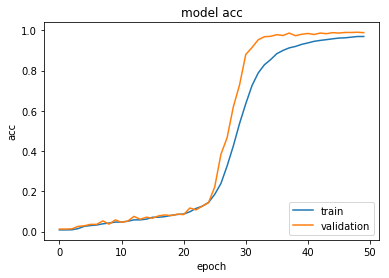

In [95]:
plot_train(history)

In [39]:
indx = 44

print(np.argmax(x_test[indx,0:1]),
      np.argmax(x_test[indx,2:11]),
      np.argmax(x_test[indx,12:21]),
      np.argmax(x_test[indx,22:23]),
      np.argmax(x_test[indx,24:33]),
      np.argmax(x_test[indx,34:43]))

0 0 8 0 7 5


In [40]:
for result in model.predict(x_test[indx:indx+1]):
    print(np.argmax(result))

83


In [41]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.163247558066
Test accuracy: 0.96548223326


In [42]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = [str(cls) for cls in range(0,y_train.shape[1]-1)]
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         2
          7       1.00      0.25      0.40         4
          8       1.00      1.00      1.00         4
          9       1.00      1.00      1.00         4
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         4
         12       1.00      1.00      1.00         4
         13       1.00      1.00      1.00         4
         14       1.00      1.00      1.00         4
         15       1.00      1.00      1.00         4
         16       1.00      1.00      1.00         4
         17       1.00      1.00      1.00   

/Users/ianlo/anaconda/envs/tensorflow13_py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 150, does not match size of target_names, 200
  .format(len(labels), len(target_names))
/Users/ianlo/anaconda/envs/tensorflow13_py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ianlo/anaconda/envs/tensorflow13_py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


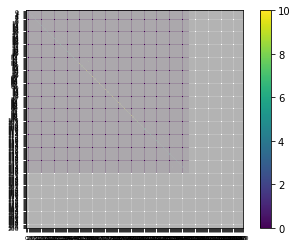

In [44]:
import numpy as np
import matplotlib.pyplot as plt

confmat=confusion_matrix(y_test, y_pred)
ticks=np.linspace(0, 200,num=201)
plt.imshow(confmat, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()